<a href="https://colab.research.google.com/github/holydiver-zerog/repository-public/blob/main/DLtest4_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# list4.24.py
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

In [2]:
# list4.25.py
import sklearn.datasets
from sklearn.model_selection import train_test_split
digits = sklearn.datasets.load_digits()
X = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"学習データ（問題画像）　：{x_train.shape}")
print(f"テストデータ（問題画像）：{x_test.shape}")

学習データ（問題画像）　：(1347, 64)
テストデータ（問題画像）：(450, 64)


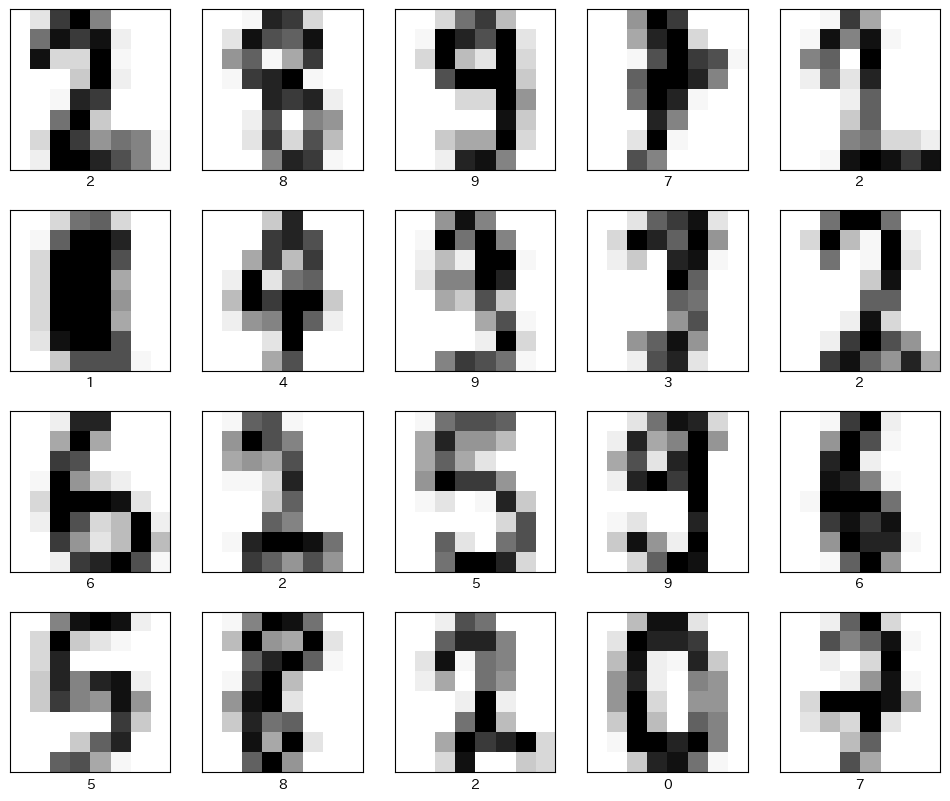

In [3]:
# list4.26.py
def disp_data(xdata, ydata):
    plt.figure(figsize=(12,10))
    for i in range(20):
        plt.subplot(4,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(xdata[i].reshape(8,8), cmap="Greys")
        plt.xlabel(ydata[i])
    plt.show()

disp_data(x_train, y_train)

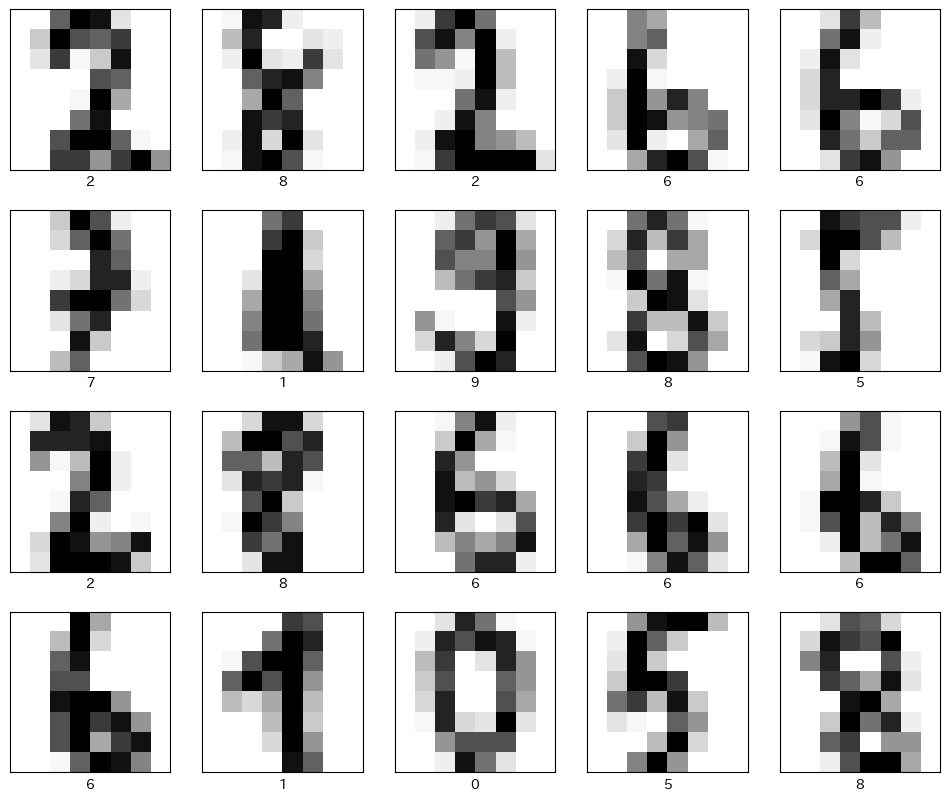

In [4]:
# list4.27.py
disp_data(x_test, y_test)

In [5]:
# list4.28.py
model = keras.models.Sequential()
model.add(layers.Dense(128, activation="relu", input_dim=64))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,610 (37.54 KB)

 Trainable params: 9,610 (37.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# list4.29.py
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=10, #10
                    validation_data=(x_test, y_test))
test_loss, test_acc =model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2468 - loss: 2.2846 - val_accuracy: 0.5800 - val_loss: 2.2396
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5762 - loss: 2.2217 - val_accuracy: 0.6644 - val_loss: 2.1564
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7413 - loss: 2.1245 - val_accuracy: 0.7511 - val_loss: 2.0376
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7968 - loss: 1.9870 - val_accuracy: 0.7600 - val_loss: 1.8832
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8483 - loss: 1.8242 - val_accuracy: 0.8400 - val_loss: 1.7083
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8352 - loss: 1.6305 - val_accuracy: 0.7978 - val_loss: 1.5270
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8424 - loss: 1.4497 - val_accuracy: 0.8067 - val_loss: 1.3548
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8394 - loss: 1.2852 - val_accuracy: 0.8111 - val_loss:

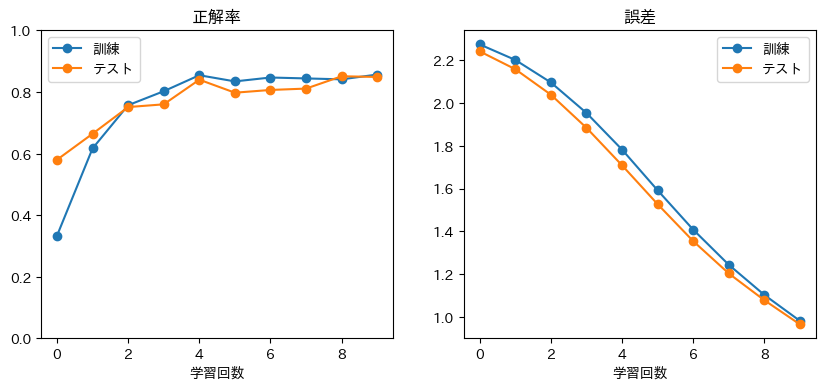

In [7]:
# list4.30.py
param = [["正解率", "accuracy", "val_accuracy"],
          ["誤差", "loss", "val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]], "o-")
    plt.plot(history.history[param[i][2]], "o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"], loc="best")
    if i==0:
        plt.ylim([0,1])
plt.show()

In [8]:
# list4.31.py
model = keras.models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_dim=64))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1024)           │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,126,410 (4.30 MB)

 Trainable params: 1,126,410 (4.30 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# list4.32.py
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=10, #10
                    validation_data=(x_test, y_test))
test_loss, test_acc =model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.3806 - loss: 2.1069 - val_accuracy: 0.7578 - val_loss: 1.0472
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8196 - loss: 0.8039 - val_accuracy: 0.8711 - val_loss: 0.4396
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9003 - loss: 0.3543 - val_accuracy: 0.9244 - val_loss: 0.3072
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9336 - loss: 0.2230 - val_accuracy: 0.9267 - val_loss: 0.2404
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9433 - loss: 0.1867 - val_accuracy: 0.9600 - val_loss: 0.1835
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9563 - loss: 0.1612 - val_accuracy: 0.9400 - val_loss: 0.1741
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9612 - loss: 0.1382 - val_accuracy: 0.9533 - val_loss: 0.1603
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9698 - loss: 0.1069 - val_accuracy: 0.9600 - v

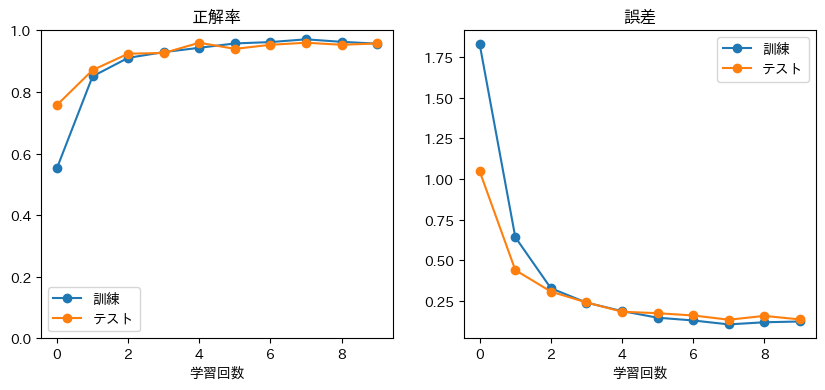

In [10]:
# list4.33.py
param = [["正解率", "accuracy", "val_accuracy"],
          ["誤差", "loss", "val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]], "o-")
    plt.plot(history.history[param[i][2]], "o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"], loc="best")
    if i==0:
        plt.ylim([0,1])
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


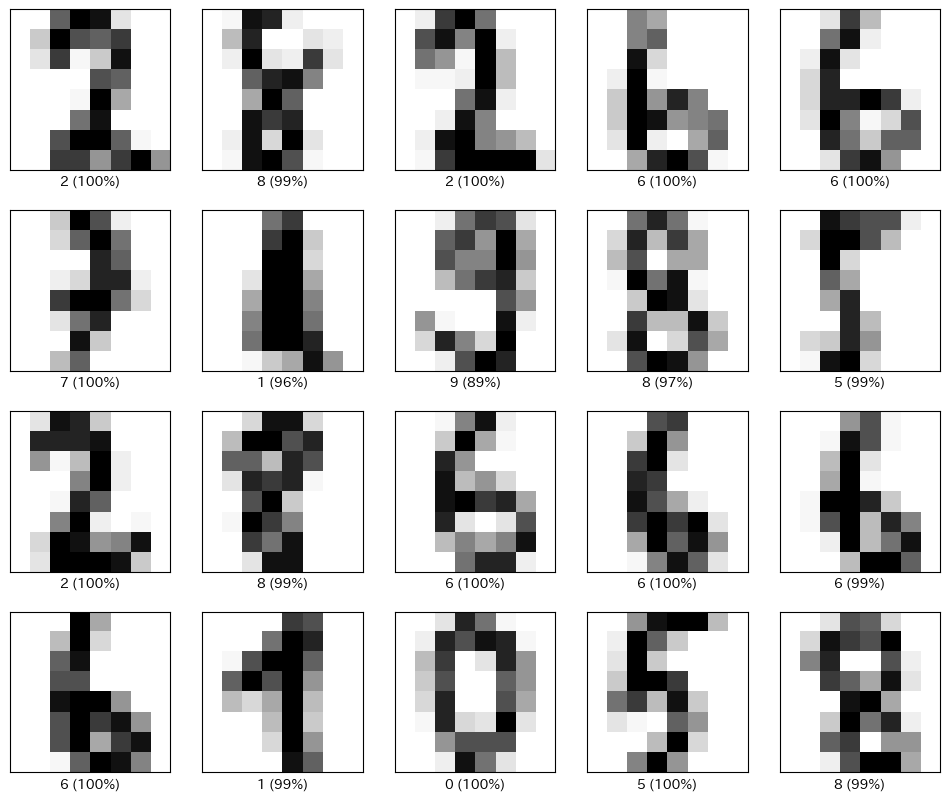

In [14]:
# list4.34.py
pre = model.predict(x_test)

plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].reshape(8,8), cmap="Greys")

    index = np.argmax(pre[i])
    pct = pre[i][index]
    ans = ""
    if index != y_test[i]:
        ans = "x--o["+str(y_test[i])+"]"
    lbl = f"{index} ({pct:.0%}){ans}"
    plt.xlabel(lbl)
plt.show()